# **COTTON LEAF DISEASE DETECTION**



In [2]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#pip install split-folders

**TRAIN, TEST, VALIDATION**

In [4]:
import splitfolders
splitfolders.ratio("D:/agrids/cotton/", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 0 files [00:00, ? files/s]


In [5]:
train_dir = 'D:/agrids/cotton/data/'  
validation_dir = 'D:/agrids/cotton/data/' 
test_dir ='D:/agrids/cotton/data/' 

**GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES**

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180, 180),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')


train_steps_per_epoch = train_generator.samples // batch_size
val_steps_per_epoch = val_generator.samples // batch_size

Found 1951 images belonging to 4 classes.
Found 1951 images belonging to 4 classes.


**PLOTTING TRAIN IMAGES WITH THEIR LABELS**

In [7]:
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])

class_names = ['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf','fresh cotton plant']

In [8]:
#pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


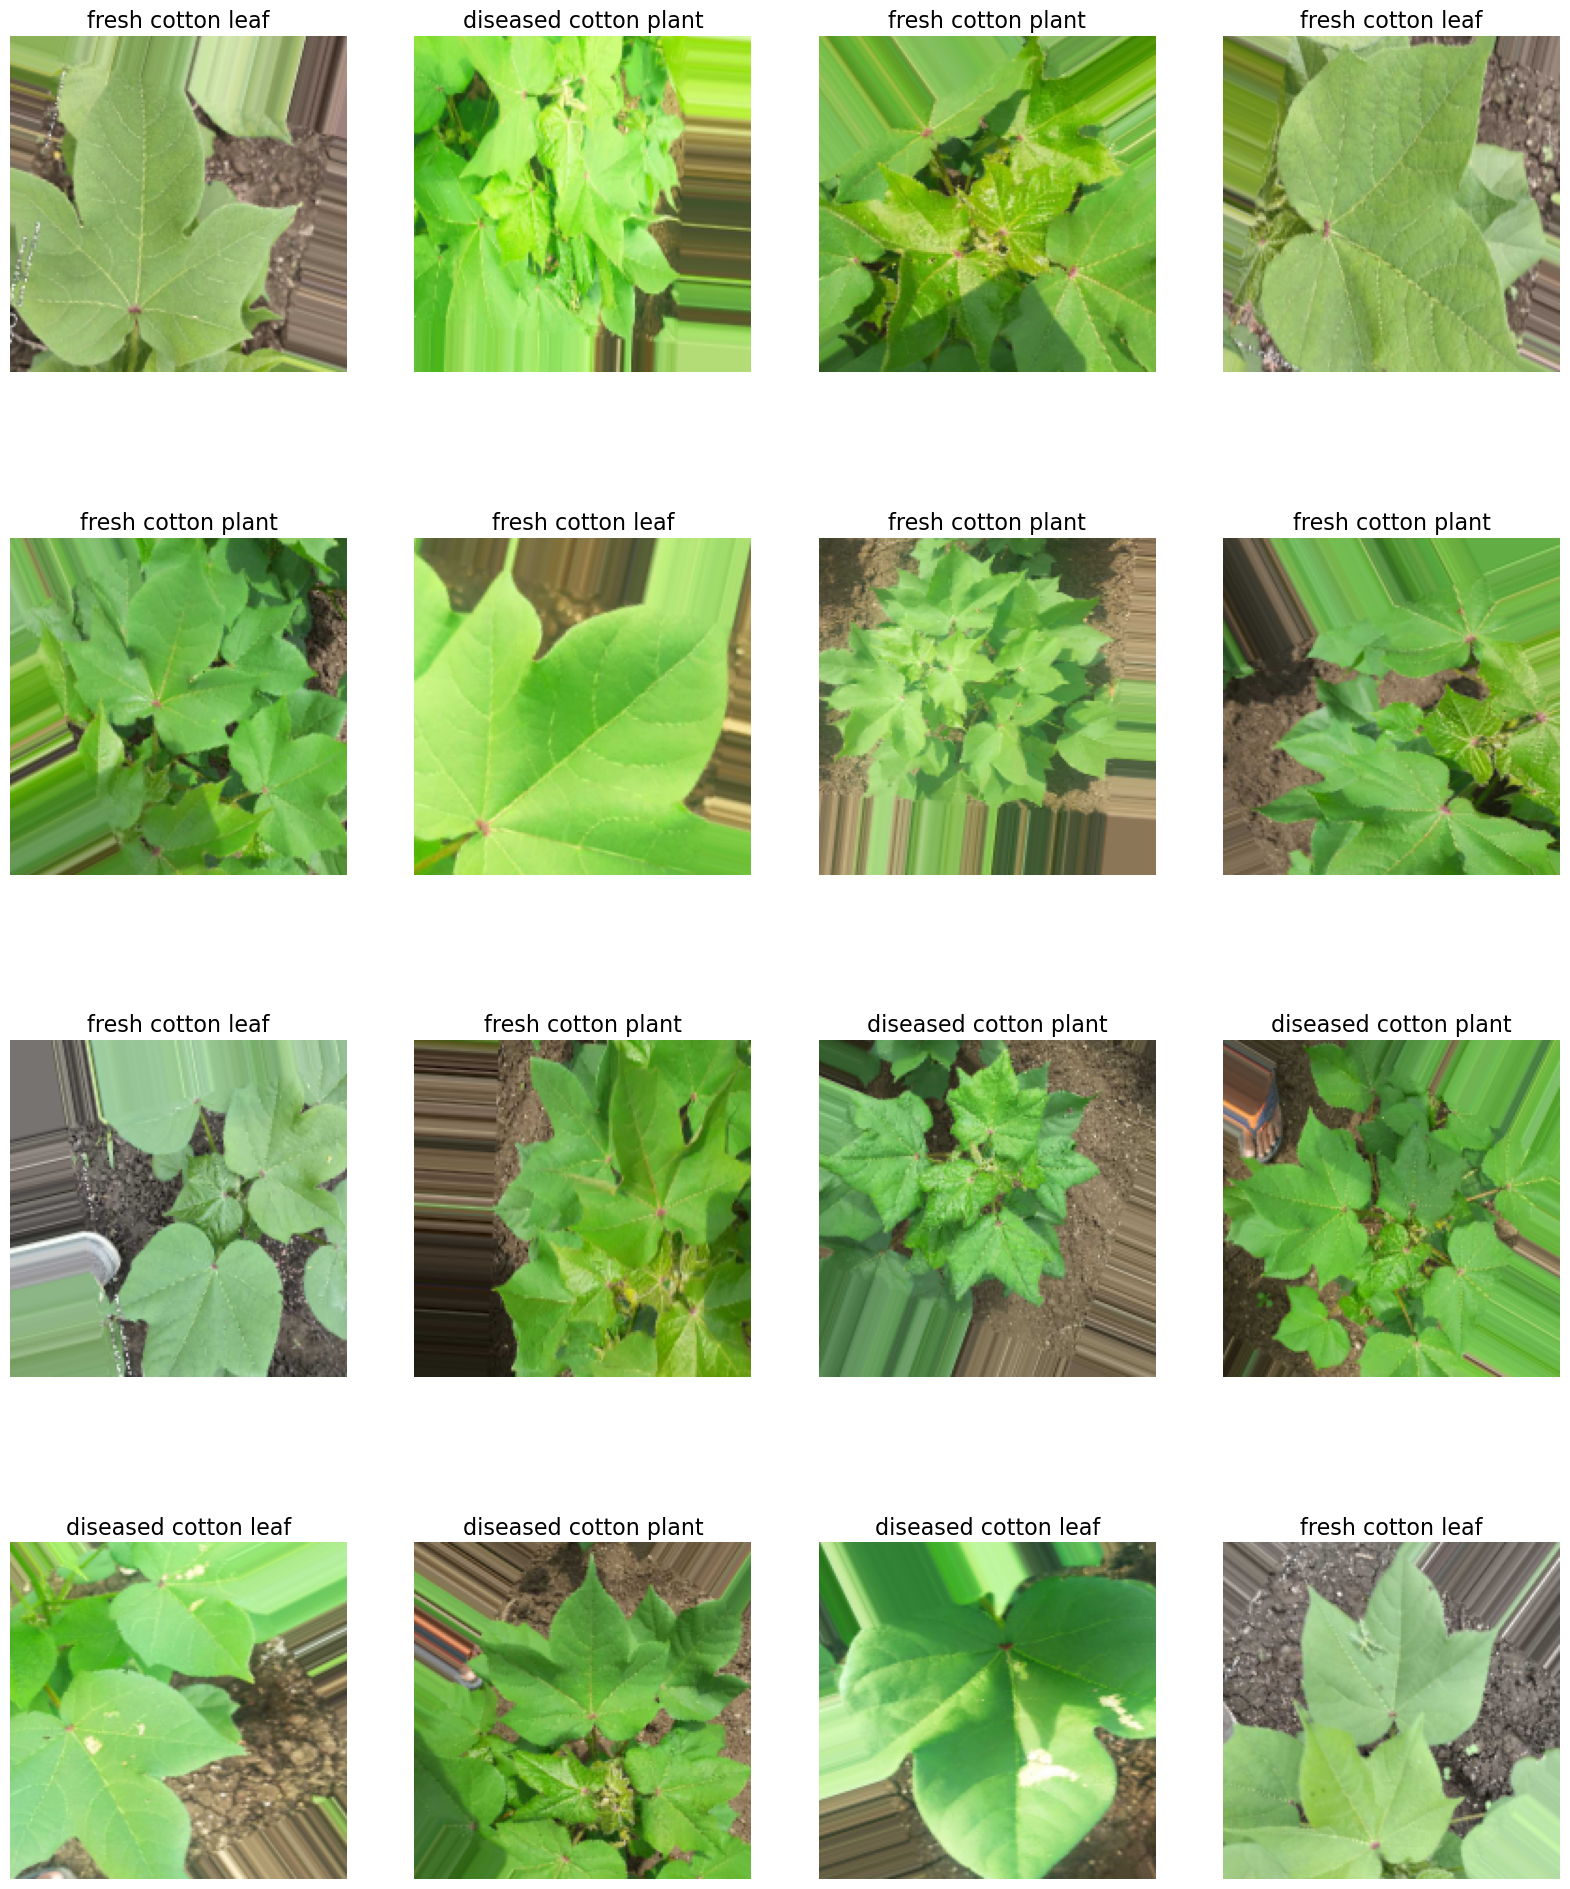

In [9]:
import matplotlib.pyplot as plt

imgs, labels = next(train_generator)
plots(imgs, title=labels)

CNN MODEL ARCHITECTURE

In [10]:
from tensorflow.keras.layers import Activation
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation ='softmax'))

SUMMARY OF MODEL

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

COMPILE MODEL

In [13]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


TRAIN MODEL

In [14]:


history = model.fit_generator(train_generator,
    epochs=50, 
    validation_data = val_generator,
)

Epoch 1/50
122/122 [==============================] - 324s 3s/step - loss: 1.2043 - accuracy: 0.4572 - val_loss: 1.0874 - val_accuracy: 0.5264
Epoch 2/50
122/122 [==============================] - 238s 2s/step - loss: 1.0461 - accuracy: 0.5500 - val_loss: 0.8408 - val_accuracy: 0.6479
Epoch 3/50
122/122 [==============================] - 220s 2s/step - loss: 0.8274 - accuracy: 0.6740 - val_loss: 0.5872 - val_accuracy: 0.7427
Epoch 4/50
122/122 [==============================] - 223s 2s/step - loss: 0.7360 - accuracy: 0.7078 - val_loss: 0.7761 - val_accuracy: 0.6853
Epoch 5/50
122/122 [==============================] - 219s 2s/step - loss: 0.7064 - accuracy: 0.7176 - val_loss: 0.5167 - val_accuracy: 0.8011
Epoch 6/50
122/122 [==============================] - 213s 2s/step - loss: 0.5443 - accuracy: 0.7791 - val_loss: 0.3853 - val_accuracy: 0.8493
Epoch 7/50
122/122 [==============================] - 212s 2s/step - loss: 0.4223 - accuracy: 0.8391 - val_loss: 0.2712 - val_accuracy: 0.8995

**MODEL SAVING**

In [15]:
model.save("cottonmodel2.h5")

In [16]:
print("Training Accuracy:")
print(history.history['accuracy'])

print("Validation Accuracy:")
print(history.history['val_accuracy'])

Training Accuracy:
[0.4818041920661926, 0.5540748238563538, 0.5894412994384766, 0.6770886778831482, 0.7227063179016113, 0.7749871611595154, 0.8011276125907898, 0.8303434252738953, 0.8252178430557251, 0.8421322107315063, 0.8518708348274231, 0.8641722202301025, 0.8641722202301025, 0.8749359250068665, 0.8605843186378479, 0.8805740475654602, 0.8923628926277161, 0.8877498507499695, 0.8995386958122253, 0.8990261554718018]
Validation Accuracy:
[0.5248590707778931, 0.6048180460929871, 0.722193717956543, 0.8001025319099426, 0.8139415979385376, 0.8149666786193848, 0.8605843186378479, 0.8985135555267334, 0.8790363669395447, 0.7754997611045837, 0.768836498260498, 0.9302921295166016, 0.9041517376899719, 0.9108149409294128, 0.9390056133270264, 0.9261916875839233, 0.9323424100875854, 0.9256791472434998, 0.9343926310539246, 0.9354177117347717]


In [17]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f'Final Training Accuracy: {final_train_accuracy:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')


Final Training Accuracy: 0.8990
Final Validation Accuracy: 0.9354


**PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS**

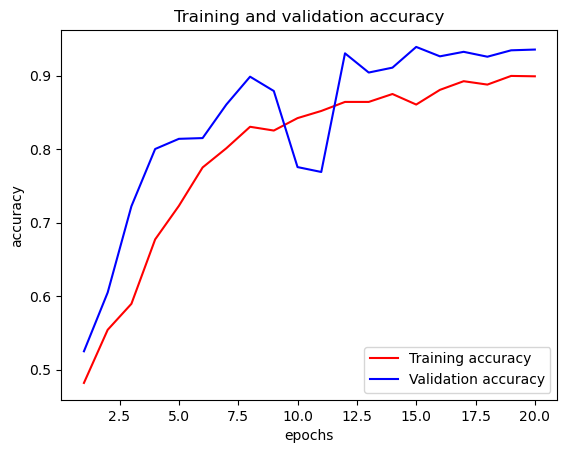

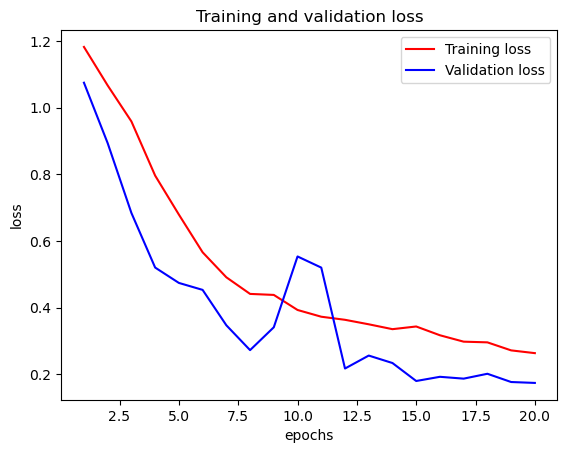

In [18]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [20]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 1951 images belonging to 4 classes.


1/1 [==============================] - 0s 43ms/step


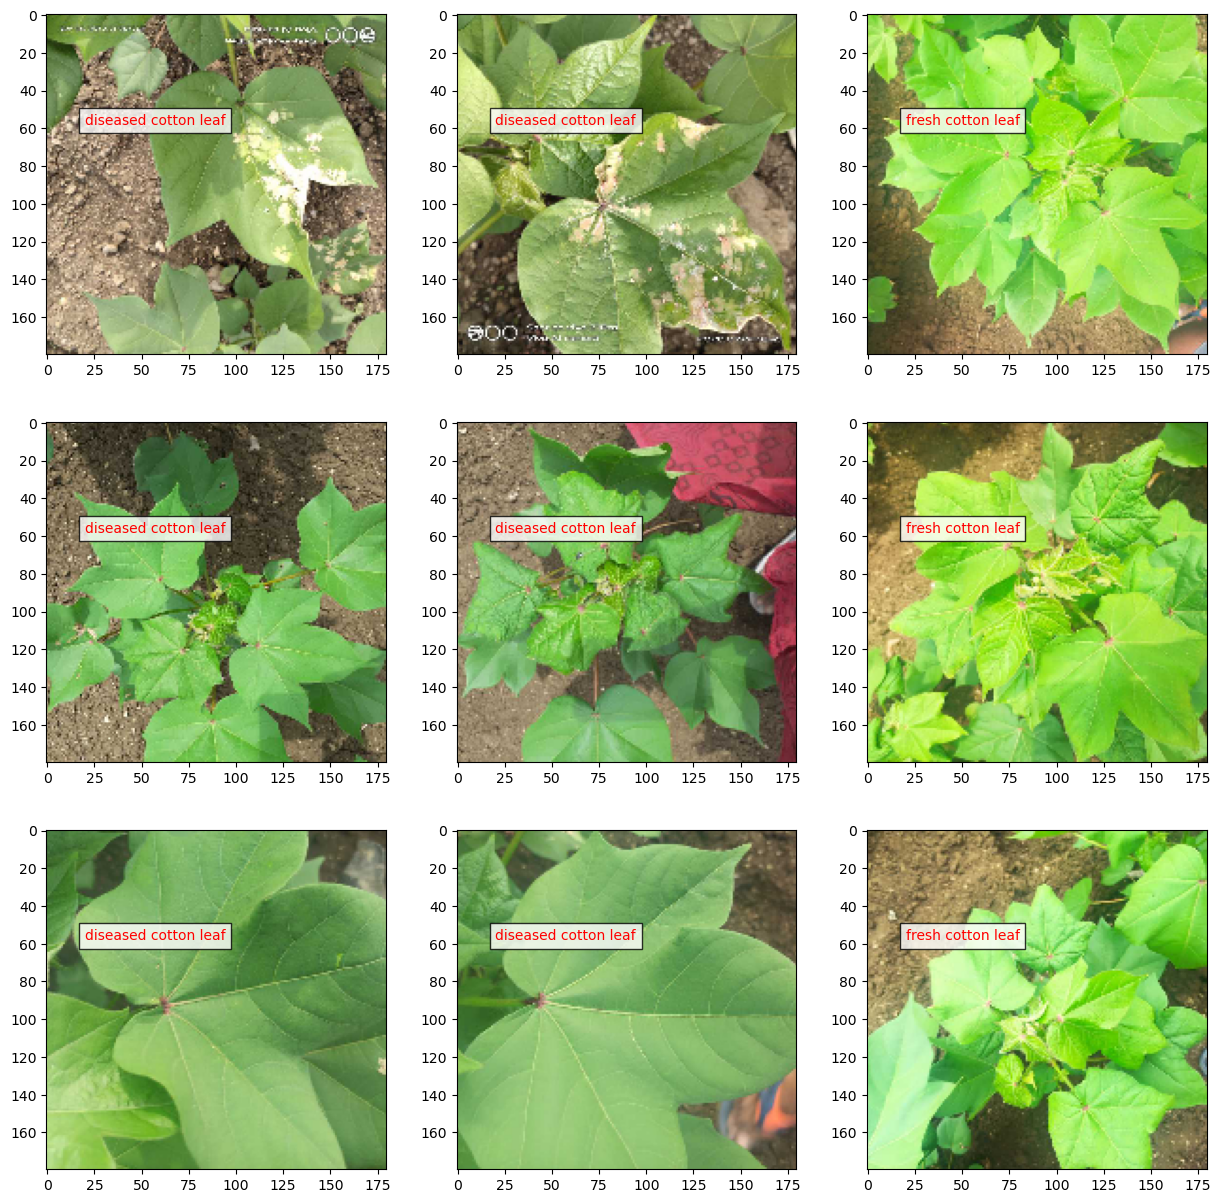

In [22]:
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])